In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)  

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Climate Analysis

In [10]:
recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent

('2017-08-23')

In [11]:
date_prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between
('2016-08-23', 'recent')).all()
date_prcp_df = pd.DataFrame(date_prcp)
date_prcp_df

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


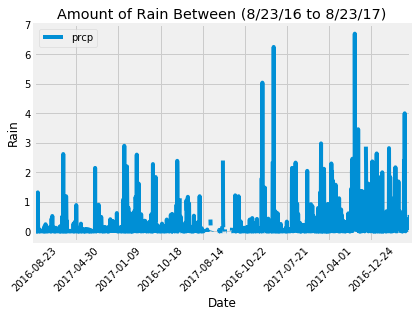

In [12]:
date_prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain")
plt.title("Amount of Rain Between (8/23/16 to 8/23/17)")
plt.xticks(rotation=45)
plt.show()

In [13]:
date_prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
stations = session.query(Measurement).group_by(Measurement.station).count()
stations

9

In [15]:
busiest = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station)\
               .order_by(func.count(Measurement.tobs).desc()).all()

for station, count in busiest:
    print("Station",station,"-", count,"Observations")
print("-------------------------------------")
print("USC00519281 had the most observations")

Station USC00519281 - 2772 Observations
Station USC00519397 - 2724 Observations
Station USC00513117 - 2709 Observations
Station USC00519523 - 2669 Observations
Station USC00516128 - 2612 Observations
Station USC00514830 - 2202 Observations
Station USC00511918 - 1979 Observations
Station USC00517948 - 1372 Observations
Station USC00518838 - 511 Observations
-------------------------------------
USC00519281 had the most observations


In [16]:
observations = session.query(Measurement.station, Measurement.tobs).filter\
               (Measurement.date.between('2016-08-23', 'recent'))\
               .filter(Measurement.station == "USC00519281").all()
observations

[('USC00519281', 77.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 75.0),
 ('USC00519281', 73.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 73.0),
 ('USC00519281', 74.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 76.0),
 ('USC00519281', 79.0),
 ('USC00519281', 75.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 76.0),
 ('USC00519281', 74.0),
 ('USC00519281', 77.0),
 ('USC00519281', 78.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 77.0),
 ('USC00519281', 80.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 77.0),
 ('USC00519281', 79.0),
 ('USC00519281',

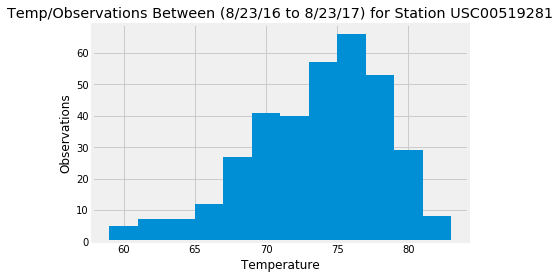

In [17]:
observations_df=pd.DataFrame(observations)
plt.hist(observations_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("Temp/Observations Between (8/23/16 to 8/23/17) for Station USC00519281")
plt.show()